# IMDB Data cleaning and processing
### Goal: combine all IMDB data, replace "nulls" with nan, keep only useful features, process text,  and output to csv

_____
## Import libraries and data

In [43]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import imdb
import pandas as pd
import time
import numpy as np

In [100]:
imdb_data_1 = pd.read_csv("imdb_full_dataset_0_35999.csv")
imdb_data_2 = pd.read_csv("imdb_full_dataset_36000_36599.csv")
imdb_data_3 = pd.read_csv("all-results.tsv", sep='\t')
print(imdb_data_1.shape)
print(imdb_data_2.shape)
print(imdb_data_3.shape)

(25745, 46)
(324, 46)
(40556, 45)


In [101]:
del imdb_data_1['Unnamed: 0']
del imdb_data_2['Unnamed: 0']

In [102]:
tmdb_data = pd.read_csv("All_TMDB_info_merged.csv")

In [103]:
print(tmdb_data.shape)
#tmdb_data.head()
print(imdb_data_1.shape)
print(imdb_data_2.shape)
print(imdb_data_3.shape)

(79716, 16)
(25745, 45)
(324, 45)
(40556, 45)


In [104]:
imdb_data_3.head()

,tt0054221,null,null.1,null.2,movie,1960,6.3,null.3,55,[u'103'],...,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24
0,tt0146298,A Sweeter Song,"Sweeter Song, A",null,movie,1976,4.8,null,22,[u'91'],...,0,1,0,0,0,0,0,0,0,0
1,tt0146290,Der Stern von Bethlehem,"Stern von Bethlehem, Der",null,movie,1921,5.2,null,29,null,...,0,0,0,0,0,0,0,0,0,0
2,tt0059943,"Barev, yes em","Barev, yes em",null,movie,1966,7.1,null,45,[u'137'],...,0,0,0,0,0,0,0,0,0,0
3,tt1744665,Episode dated 22 January 2004,Episode dated 22 January 2004,null,episode,2004,null,null,null,null,...,0,0,0,0,1,0,0,0,0,0
4,tt0486708,Maskeli Besler: Intikam Pesinde,Maskeli Besler: Intikam Pesinde,null,movie,2005,4.1,null,3138,[u'89'],...,0,0,0,0,0,0,0,0,0,0


In [96]:
frames = [imdb_data_1, imdb_data_2, imdb_data_3]
imdb_data = pd.concat(frames)
imdb_data.shape

(66625, 90)

In [34]:
#imdb_data['id'] = imdb_data['id'].str.strip('tt')

In [53]:
imdb_data.columns

Index([u'Unnamed: 0', u'id', u'title', u'canonical title', u'imdbIndex',
       u'kind', u'year', u'rating', u'mpaa', u'votes', u'runtimes',
       u'color info', u'genres', u'languages', u'plot', u'countries',
       u'director', u'writer', u'cast', u'certificates', u'Action',
       u'Adventure', u'Adult', u'Animation', u'Comedy', u'Crime',
       u'Documentary', u'Drama', u'Family', u'Fantasy', u'Film-Noir',
       u'Horror', u'Musical', u'Mystery', u'Romance', u'Sci-Fi', u'Short',
       u'Thriller', u'War', u'Western', u'Talk-Show', u'News', u'Game-Show',
       u'Reality-TV', u'History', u'Sport'],
      dtype='object')

In [26]:
#imdb_data['id'] = imdb_data['id'].astype(int)

## Which features should we keep from IMDB?

Likely to be helpful:
- Rating
- Votes
- Color info
- Languages
- Countries

Possibly helpful:
- Director
- Writer
- Cast

Probably not helpful:
- IMDB Index: mostly nulls
- MPAA: mostly nulls
- Certificate: mostly nulls
- Title: already getting this from TMDB
- Year: already getting from TMDB
- Runtimes: already getting from TMDB
- Plot: already getting "overview" from TMDB

## Keep only Rating, Votes, Color Info, Languages, Countries, Director, Writer, and Cast

In [54]:
for column_name in ['canonical title', 'imdbIndex', 'mpaa','kind','year', 'runtimes', 'plot', 'certificates']:
    del imdb_data[column_name]

imdb_useful = imdb_data

In [56]:
print imdb_useful.shape
imdb_useful.head()

(26069, 38)


,id,title,rating,mpaa,votes,color info,genres,languages,countries,director,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,tt0000159,null,5.5,null,23,[u'Black and White'],"[u'Short', u'Horror']",null,[u'France'],null,...,1,0,0,0,0,0,0,0,0,0
1,tt0000598,Hamlet,5.3,null,18,[u'Black and White'],"[u'Short', u'Drama']",null,[u'France'],null,...,1,0,0,0,0,0,0,0,0,0
2,tt0000709,Julius Caesar,5.8,null,12,[u'Black and White'],"[u'Short', u'Drama', u'History']",[u'English'],[u'USA'],"['J. Stuart Blackton', 'William V. Ranous']",...,1,0,0,0,0,0,0,0,1,0
3,tt0001078,Two Memories,6.6,null,5,[u'Black and White'],"[u'Short', u'Drama']",[u'English'],[u'USA'],['D.W. Griffith'],...,1,0,0,0,0,0,0,0,0,0
4,tt0002031,As You Like It,5.2,null,6,[u'Black and White'],null,[u'English'],[u'USA'],"['J. Stuart Blackton', 'Charles Kent', 'James ...",...,null,null,null,null,null,null,null,null,null,null


In [57]:
result = tmdb_data.merge(imdb_useful, left_on='imdb_id', right_on='id', how='inner')

In [58]:
result.columns

Index([u'movie_id', u'revenue', u'overview', u'genres_x', u'title_x',
       u'vote_count', u'imdb_id', u'popularity', u'budget', u'vote_average',
       u'runtime', u'red_pixel', u'green_pixel', u'blue_pixel',
       u'release_date_month', u'release_date_year', u'id', u'title_y',
       u'rating', u'mpaa', u'votes', u'color info', u'genres_y', u'languages',
       u'countries', u'director', u'writer', u'cast', u'Action', u'Adventure',
       u'Adult', u'Animation', u'Comedy', u'Crime', u'Documentary', u'Drama',
       u'Family', u'Fantasy', u'Film-Noir', u'Horror', u'Musical', u'Mystery',
       u'Romance', u'Sci-Fi', u'Short', u'Thriller', u'War', u'Western',
       u'Talk-Show', u'News', u'Game-Show', u'Reality-TV', u'History',
       u'Sport'],
      dtype='object')

## Replace nulls with nan

In [59]:
result_nona = result.replace(to_replace="null", value=np.nan, inplace=False)

In [67]:
result_nona.head()

,movie_id,revenue,overview,genres_x,title_x,vote_count,imdb_id,popularity,budget,vote_average,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,16,40031879,"Selma, a Czech immigrant on the verge of blind...","['Drama', 'Crime', 'Music']",Dancer in the Dark,282,tt0168629,1.211326,12800000,7.5,...,0,0,0,0,0,0,0,0,0,0
1,20,9726954,A Pedro Almodovar production in which a fatall...,"['Drama', 'Romance']",My Life Without Me,61,tt0314412,0.942369,0,7.1,...,0,0,0,0,0,0,0,0,0,0
2,73,23875127,Derek Vineyard is paroled after serving 3 year...,['Drama'],American History X,2163,tt0120586,4.200172,20000000,8.1,...,0,0,0,0,0,0,0,0,0,0
3,102,0,Cecilie and Joachim are about to get married w...,"['Drama', 'Romance']",Open Hearts,20,tt0315543,0.718378,0,6.6,...,0,0,0,0,0,0,0,0,0,0
4,116,85306374,Match Point is Woody Allen���s satire of the B...,"['Drama', 'Thriller', 'Crime', 'Romance']",Match Point,818,tt0416320,1.551732,15000000,7.2,...,0,1,0,0,0,0,0,0,0,0


## Check the distribution of genres

In [68]:
genres = result_nona.ix[:,30:]
genres_nona = genres.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
genres_nona = genres_nona.astype(int)
genres_nona.describe()

,Adult,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
count,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,...,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000,23602.000000
mean,0.033811,0.056732,0.279595,0.088806,0.095966,0.395941,0.072113,0.038217,0.001907,0.037115,...,0.143166,0.064528,0.025040,0.034870,0.024744,0.008262,0.010677,0.007076,0.016990,0.012372
std,0.180745,0.231336,0.448810,0.284470,0.294551,0.489062,0.258680,0.191724,0.043624,0.189049,...,0.350249,0.245697,0.156251,0.183454,0.155346,0.090521,0.102779,0.083821,0.129237,0.110541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
bars = genres_nona.describe().ix[1,]

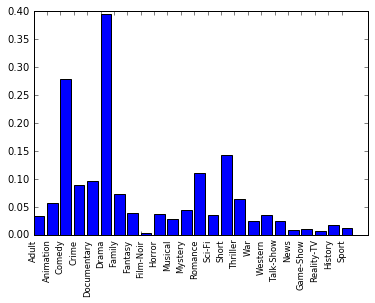

In [70]:
plt.bar(range(len(genres.columns)), bars.values)
plt.xticks(range(len(genres.columns)), genres.columns, size='small')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## We need to process Color Info, Languages, Countries, Director, Writer, and Cast

### Process languages

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
def bagOfWords(column_name, max_features):
    count = 0
    all_words = []
    print column_name
    for i in imdb_useful[column_name]:
        i=str(i).replace(" ", "")
        try:
            all_words.append(i.decode('utf-8'))
        except:
            all_words.append('')
    print("Word examples",all_words[10:20])
    vectorizer = CountVectorizer(stop_words = 'english', max_features=max_features)
    all_data_features = vectorizer.fit_transform(all_words).todense()
    all_feature_names = [column_name + '_' +i.encode('utf-8') for i in vectorizer.get_feature_names()]
    print "Feature names", all_feature_names[:10]
    for i in range(len(all_feature_names)):
        imdb_useful[all_feature_names[i]] = all_data_features[:,i]
    del imdb_useful[column_name]
    print(" ")

In [74]:
for column_name in ['color info', 'languages', 'countries']:
    bagOfWords(column_name, max_features=100)

color info
('Word examples', [u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']", u"[u'BlackandWhite']"])
Feature names ['color info_16mmversion', 'color info_1966', 'color info_1969', 'color info_35mmversion', 'color info_agfacolor', 'color info_alphacine', 'color info_anscocolor', 'color info_archivefilms', 'color info_archivefootage', 'color info_ascolorbypath']
 
languages
('Word examples', [u"[u'English']", u"[u'English']", u'null', u'null', u"[u'None']", u"[u'English']", u"[u'English']", u'null', u"[u'English']", u"[u'English']"])
Feature names ['languages_afrikaans', 'languages_albanian', 'languages_americansignlanguage', 'languages_ancient', 'languages_arabic', 'languages_armenian', 'languages_assamese', 'languages_bambara', 'languages_basque', 'languages_bengali']
 
countries
('Word examples', [u"[u'USA']", u"[u'USA']", u"[u

In [75]:
for column_name in ['director', 'writer', 'cast']:
    bagOfWords(column_name, max_features=100)

director
('Word examples', [u"['WilliamS.Hart','CliffordSmith']", u"['LawrenceB.McGill']", u"['MauriceElvey']", u"['CecilM.Hepworth']", u"['QuirinoCristiani']", u"['HarryA.Gant']", u"['FredNiblo']", u"['GeorgeIrving']", u"['WesleyRuggles']", u"['SidneyOlcott']"])
Feature names ['director_alanj', 'director_albertomariscal', 'director_albertopieralisi', 'director_alberts', 'director_alfrede', 'director_alfredob', 'director_allandwan', 'director_amato', 'director_anderson', 'director_anthonycaleca']
 
writer
('Word examples', [u"['ThomasH.Ince','ThomasH.Ince','S.BarretMcCormick','S.BarretMcCormick']", u"['BurnsMantle']", u"['KenelmFoss','WilliamShakespeare']", u"['AlmaTaylor']", u"['QuirinoCristiani']", u"['GeorgeJohnson','DoraMitchell']", u"['BrianOswaldDonn-Byrne','C.GardnerSullivan']", u"['GeorgeM.Arthur','EdmundGoulding']", u"['StewartEdwardWhite']", u"['KathrynStuart','KateDouglasWiggin']"])
Feature names ['writer_adelebuffington', 'writer_albertdemond', 'writer_alekossakellarios', '

### Output data to csv

In [78]:
final_output = result_nona
final_output.shape

(26084, 54)

In [84]:
final_output.ix[:,0:20].head()

,movie_id,revenue,overview,genres_x,title_x,vote_count,imdb_id,popularity,budget,vote_average,runtime,red_pixel,green_pixel,blue_pixel,release_date_month,release_date_year,id,title_y,rating,mpaa
0,16,40031879,"Selma, a Czech immigrant on the verge of blind...","['Drama', 'Crime', 'Music']",Dancer in the Dark,282,tt0168629,1.211326,12800000,7.5,140.0,133.582333,122.911816,119.734424,17.0,5.0,tt0168629,Dancer in the Dark,8.0,Rated R for some violence
1,20,9726954,A Pedro Almodovar production in which a fatall...,"['Drama', 'Romance']",My Life Without Me,61,tt0314412,0.942369,0,7.1,106.0,83.570176,60.122611,65.661373,7.0,3.0,tt0314412,My Life Without Me,7.6,Rated R for language
2,73,23875127,Derek Vineyard is paroled after serving 3 year...,['Drama'],American History X,2163,tt0120586,4.200172,20000000,8.1,119.0,127.049749,64.969528,58.728907,30.0,10.0,tt0120586,American History X,8.6,Rated R for graphic brutal violence including ...
3,102,0,Cecilie and Joachim are about to get married w...,"['Drama', 'Romance']",Open Hearts,20,tt0315543,0.718378,0,6.6,113.0,152.745667,127.084353,119.593476,6.0,9.0,tt0315543,Elsker dig for evigt,7.6,Rated R for language and sexuality
4,116,85306374,Match Point is Woody Allen���s satire of the B...,"['Drama', 'Thriller', 'Crime', 'Romance']",Match Point,818,tt0416320,1.551732,15000000,7.2,124.0,146.499893,143.972205,145.920195,12.0,5.0,tt0416320,Match Point,7.7,Rated R for some sexuality


In [85]:
final_output.ix[:,20:30].head()

,votes,color info,genres_y,languages,countries,director,writer,cast,Action,Adventure
0,83033,[u'Color'],"[u'Crime', u'Drama', u'Musical']","[u'English', u'German', u'Czech']","[u'Denmark', u'Spain', u'Germany', u'Netherlan...",['Lars von Trier'],['Lars von Trier'],NaN,0,0
1,21762,[u'Color'],"[u'Drama', u'Romance']",[u'English'],"[u'Spain', u'Canada']",['Isabel Coixet'],"['Isabel Coixet', 'Nanci Kincaid']",NaN,0,0
2,829530,"[u'Black and White', u'Color']","[u'Crime', u'Drama']",[u'English'],[u'USA'],['Tony Kaye'],['David McKenna'],NaN,0,0
3,8186,[u'Color'],"[u'Drama', u'Romance']",[u'Danish'],[u'Denmark'],['Susanne Bier'],['Anders Thomas Jensen'],NaN,0,0
4,174576,[u'Color'],"[u'Drama', u'Romance', u'Thriller']",[u'English'],"[u'UK', u'Ireland', u'Luxembourg']",['Woody Allen'],['Woody Allen'],"['Jonathan Rhys Meyers', 'Alexander Armstrong'...",0,0


In [86]:
final_output.ix[:,30:].head()

,Adult,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Horror,...,Short,Thriller,War,Western,Talk-Show,News,Game-Show,Reality-TV,History,Sport
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [80]:
final_output.to_csv("imdb_tmdb_full_dataset_clean.csv")